# Part I - HR Employee Attrition
## by Sknider Mbaisi

## Introduction

The dataset has information of 1470 employees and will be used to explore employee attrition and relationship among the different variables.

## Preliminary Wrangling


In [173]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px

%matplotlib inline

In [174]:
attrition = pd.read_csv('HR Employee Attrition.csv')

In [175]:
attrition

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [176]:
attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [177]:
attrition.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Structure of the HR Employee Attrition dataset

The HR Employee Attrition dataset has information for 1,470 employees with 35 variables which are a mix of 26 categorical variables and 9 numerical variables.


This is a fictional data set from kaggle created by IBM data scientists. Details for some of the categorical variables are:

Education: 1 'Below College', 2 'College', 3 'Bachelor', 4 'Master', 5 'Doctor'

EnvironmentSatisfaction: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'

JobInvolvement: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'

JobSatisfaction: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'

PerformanceRating: 1 'Low', 2 'Good', 3 'Excellent', 4 'Outstanding'

RelationshipSatisfaction: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'

WorkLifeBalance: 1 'Bad', 2 'Good', 3 'Better', 4 'Best'

Dataset: https://www.kaggle.com/datasets/whenamancodes/hr-employee-attrition 


### The main feature(s) of interest in the dataset

The main feature of interest in this dataset is attrition and the relationship between it and other variables, as well, the relationship between the different variables in this dataset. The dataset and analysis herein aims to uncover the factors that affect employee attrition and explore important relationships between the variables.

### Features in the dataset that will help support investigation into feature(s) of interest

Looking at the behaviour of different variables independently first, then the relationship amongst them excluding attrition will bring a view that can help us understand better the effect on attrition and also on each other.

In [178]:
#Check for variable(s) with constant value
constantvalues = attrition.apply(lambda x: len(x.unique()))
constantvalues[constantvalues ==1 ].index

Index(['EmployeeCount', 'Over18', 'StandardHours'], dtype='object')

In [179]:
#Removing variables with constant values
attrition.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis = 1, inplace = True)

In [180]:
print(attrition.shape)

(1470, 32)


## Univariate Exploration


### What is the view of attrition?

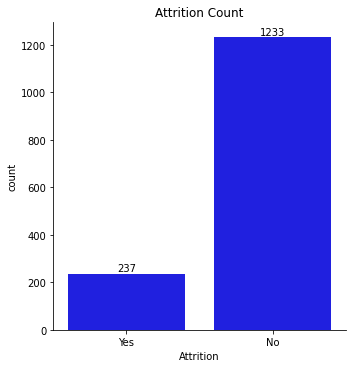

In [212]:
ax = sb.catplot(data=attrition, x='Attrition', kind='count', color='blue')
ax.axes[0,0].bar_label(ax.axes[0,0].containers[0]);
plt.title(label='Attrition Count');

#### We can tell that most employees stay with the organization compared to those who leave

### Which marital status has the highest count?

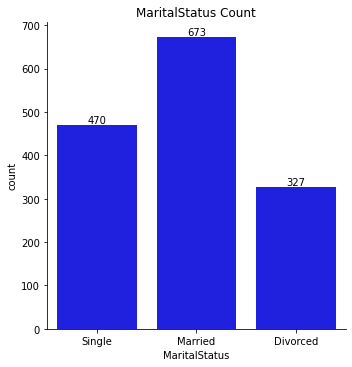

In [213]:
ax = sb.catplot(data=attrition, x='MaritalStatus', kind='count', color='blue')
ax.axes[0,0].bar_label(ax.axes[0,0].containers[0]);
plt.title(label='MaritalStatus Count');

#### Majority of the employees are married

### Which gender forms majority of the employees?

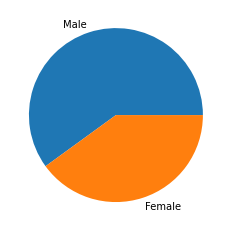

In [183]:
plt.pie(attrition['Gender'].value_counts(), labels = attrition['Gender'].value_counts().index);

#### Majority of the employees are males

### What is the ratio of employees who work overtime compared to those who do not?

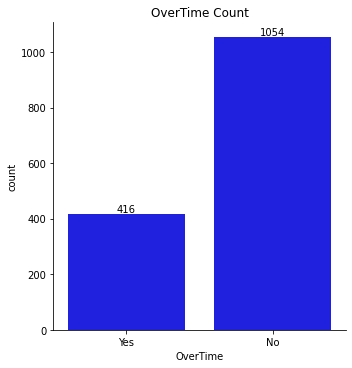

In [215]:
ax = sb.catplot(data=attrition, x='OverTime', kind='count', color='blue')
ax.axes[0,0].bar_label(ax.axes[0,0].containers[0]);
plt.title(label='OverTime Count');

#### Most employees do not work overtime

### Which education field forms the majority of the workforce?

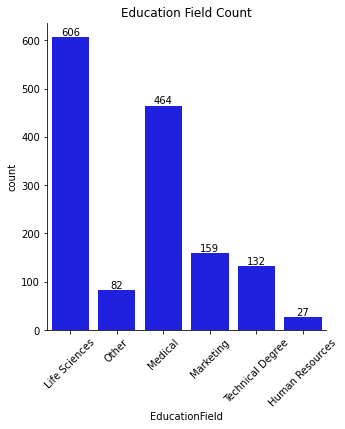

In [185]:
ax = sb.catplot(data=attrition, x='EducationField', kind='count', color='blue')
ax.axes[0,0].bar_label(ax.axes[0,0].containers[0]);
plt.xticks(rotation = 45)
plt.title(label='Education Field Count');

#### Majority of the employees did life sciences

### Which department has the highest number of employees?

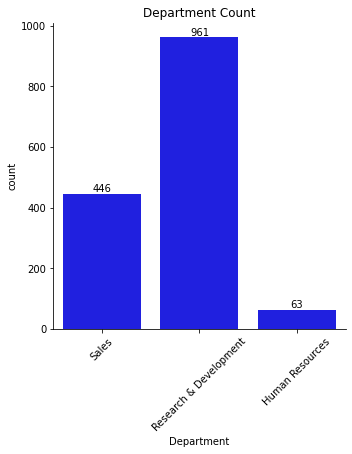

In [186]:
ax = sb.catplot(data=attrition, x='Department', kind='count', color='blue')
ax.axes[0,0].bar_label(ax.axes[0,0].containers[0]);
plt.xticks(rotation = 45)
plt.title(label='Department Count');

#### Research and Development has the highest number of employees

### What is the ratio of business travel in the workforce?

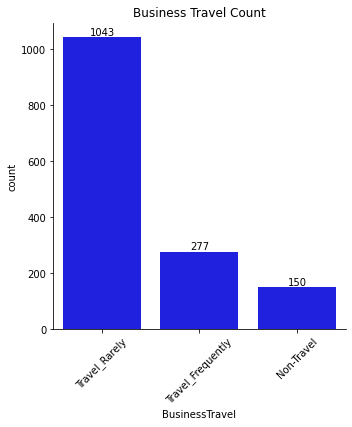

In [187]:
ax = sb.catplot(data=attrition, x='BusinessTravel', kind='count', color='blue')
ax.axes[0,0].bar_label(ax.axes[0,0].containers[0]);
plt.xticks(rotation = 45)
plt.title(label='Business Travel Count');

#### Most employees travel with majority travelling rarely 

### Which job role has most headcount independently?

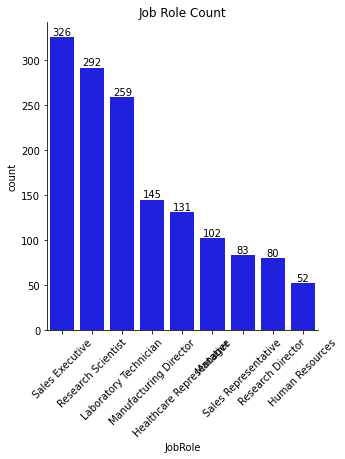

In [232]:
ax = sb.catplot(data=attrition, x='JobRole', kind='count', color='blue')
ax.axes[0,0].bar_label(ax.axes[0,0].containers[0]);
plt.xticks(rotation = 45)
plt.title(label='Job Role Count');

#### Majority of the employees are Sales Executives

### What is the age distribution of the employees?

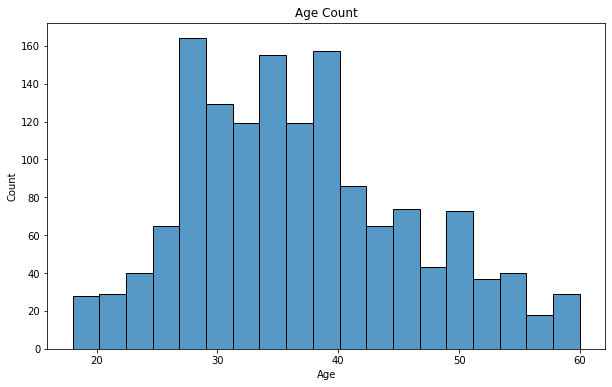

In [189]:
plt.figure(figsize = (10, 6))
sb.histplot(data=attrition,x='Age')
plt.title(label='Age Count')
plt.show();

#### We can tell that majority of the employees are in their late twenties, mid and late thirties

### What is the summary view of the caterorical variables count?

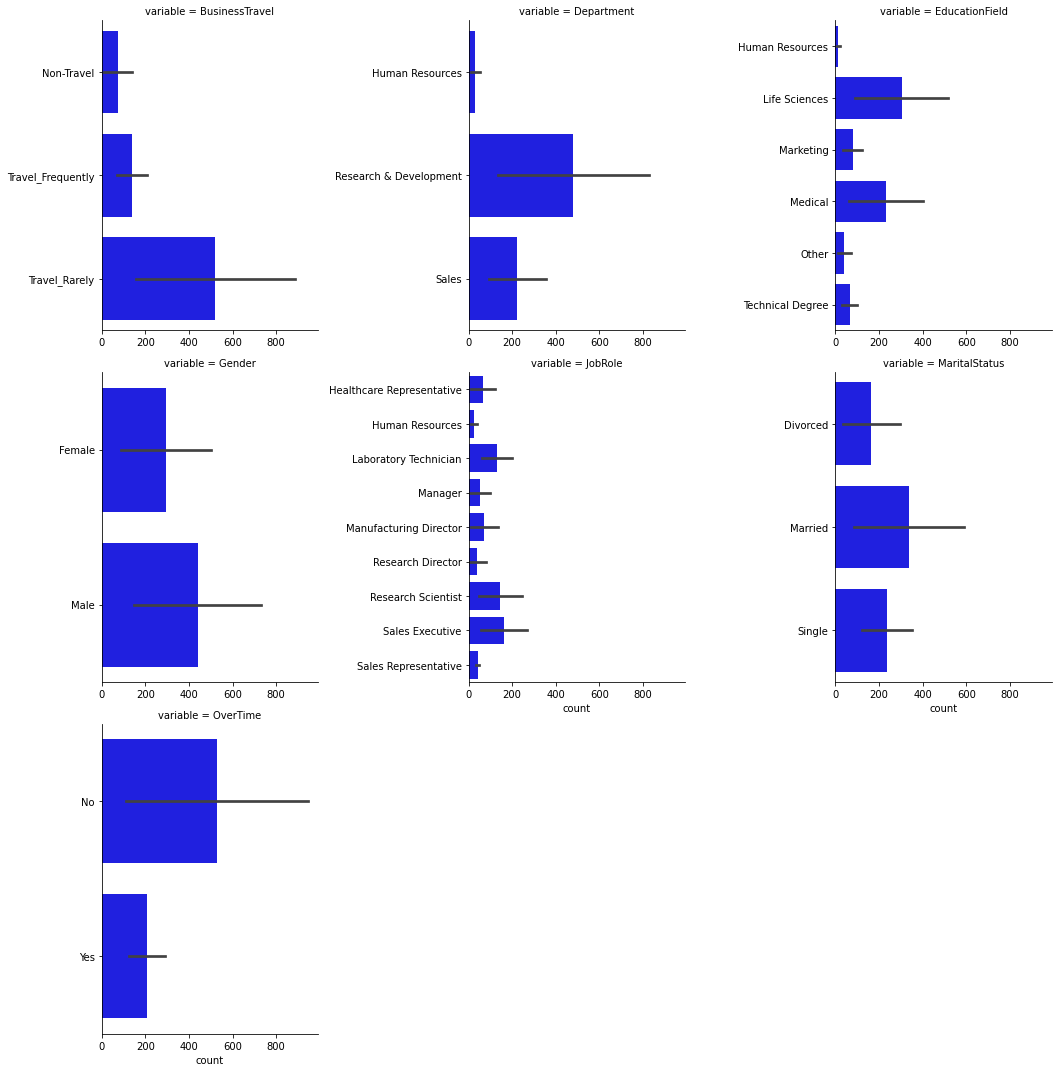

In [220]:
# get nominal categorical variables
nominals = attrition.select_dtypes(include=['object'])


# count of category per variable
val = nominals.melt(value_name = 'category', id_vars = 'Attrition')\
    .groupby(['variable', 'category', 'Attrition']).size().to_frame('count').reset_index()

g = sb.catplot(
    data=val, x='count', y='category', col='variable', kind='bar', col_wrap=3,
    orient = 'h', sharey = False, color = 'blue'
)

# show x-label for all facet
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)
    
g.set(ylabel = None);

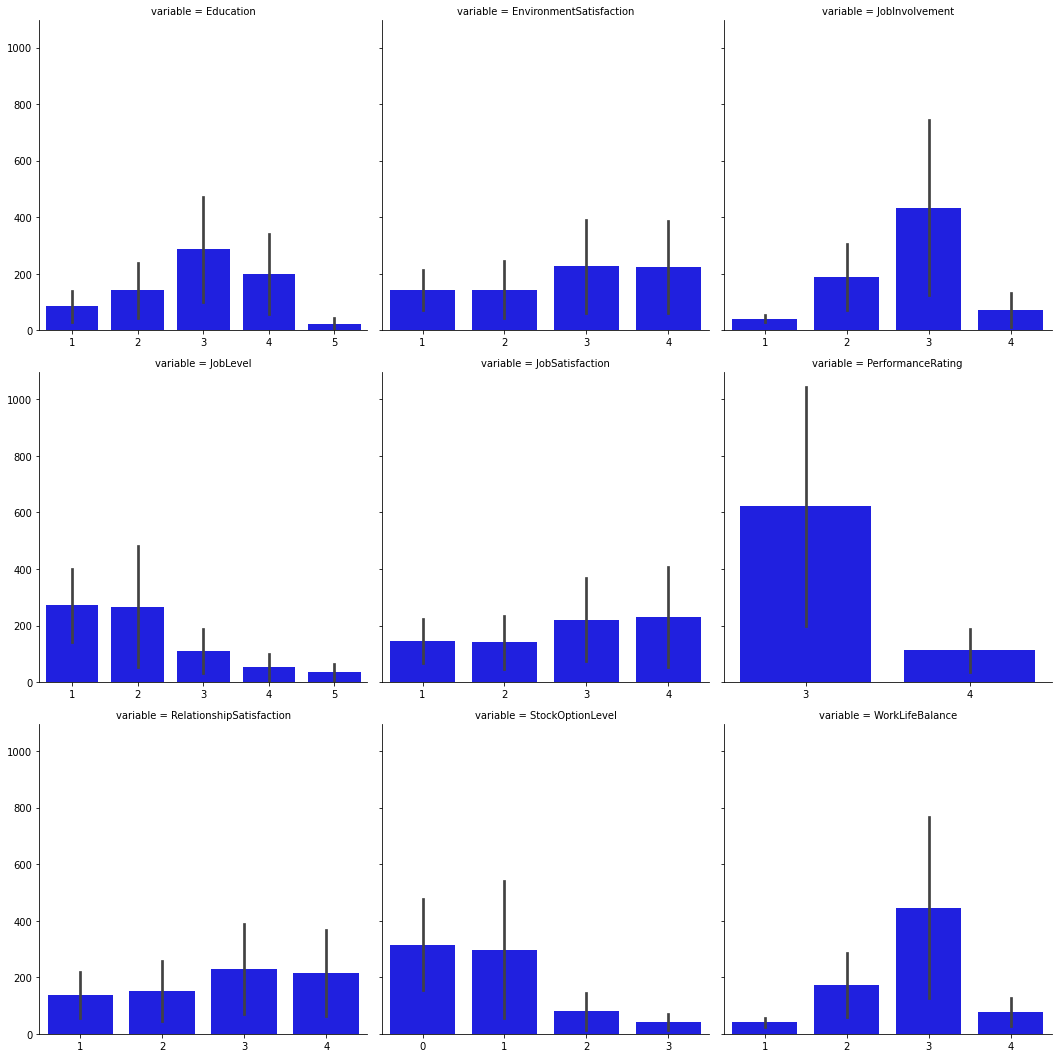

In [229]:
#get ordinal categorical variables
ordinal_vars = ['Education', 'EnvironmentSatisfaction', 'JobLevel', 'JobInvolvement', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance', 'StockOptionLevel']
ordinals = attrition[ordinal_vars]

val = pd.concat([attrition['Attrition'], ordinals], axis = 1)\
    .melt(value_name = 'category', id_vars = 'Attrition')\
    .groupby(['variable', 'category', 'Attrition']).size().to_frame('count').reset_index()
g = sb.catplot(
    data=val, x='category', y='count', col='variable', kind='bar', col_wrap=3,
    sharex = False, color='blue'
)
# show x-label for all facet
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)
    
g.set(ylabel = None, xlabel = None);

#### Most of the employees have at least a bachelor

#### Majority of employees have either high or very high environment satisfaction

#### Most workers have a high job involvement

#### In job satisfaction, majority of the employees have a high or very high satisfaction

#### The performance rating is mostly excellent

#### Relationship satifaction is either high or very high for most employees

#### Most employees have a better work life balance with the following majority having a good work life balance


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The outliers in my variables are below 5% at most in each. Therefore, I did not find this significantly affecting the investigation. However, I dropped three variables from the dataset which had constant values and therefore not adding value to this investigation. These variables are: Employeecount, Over18 and Standardhors


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The data did not require much cleaning only dropping some variables as they had only one unique value, therefore adding little to no value to the explorations.

## Bivariate Exploration

### Highest attrition is coming from employees in which job roles?

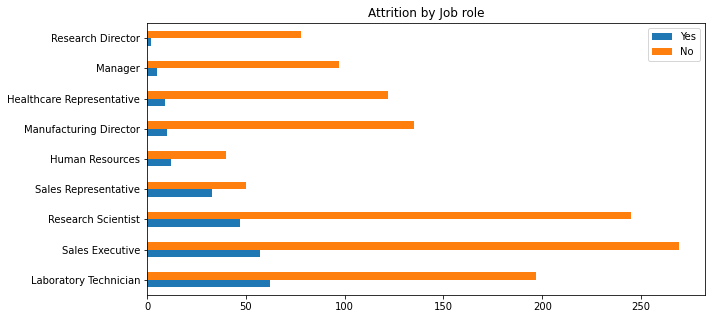

In [238]:
attrition_jobrole = pd.DataFrame()

attrition_jobrole['Yes'] = attrition[attrition['Attrition'] == 'Yes']['JobRole'].value_counts()
attrition_jobrole['No'] = attrition[attrition['Attrition'] == 'No']['JobRole'].value_counts()

attrition_jobrole.plot.barh(title = 'Attrition by Job role', figsize = (10, 5));

#### Highest attrition is coming from employees with Sales Representative title

### Which education field did most leaving employees undertake?

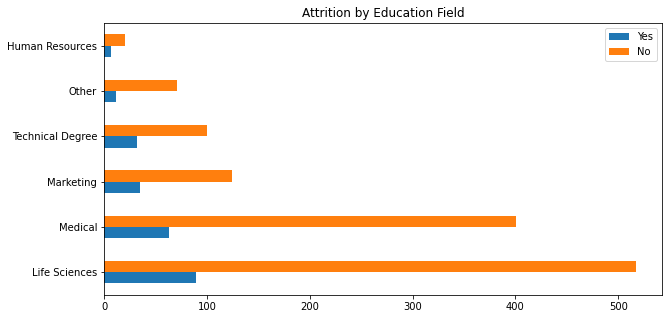

In [237]:
attrition_EducationField = pd.DataFrame()

attrition_EducationField['Yes'] = attrition[attrition['Attrition'] == 'Yes']['EducationField'].value_counts()
attrition_EducationField['No'] = attrition[attrition['Attrition'] == 'No']['EducationField'].value_counts()

attrition_EducationField.plot.barh(title = 'Attrition by Education Field', figsize = (10, 5));

#### Highest attrition is coming from technical degree and marketing education fields respectively.

### Which department has the highest attrition?

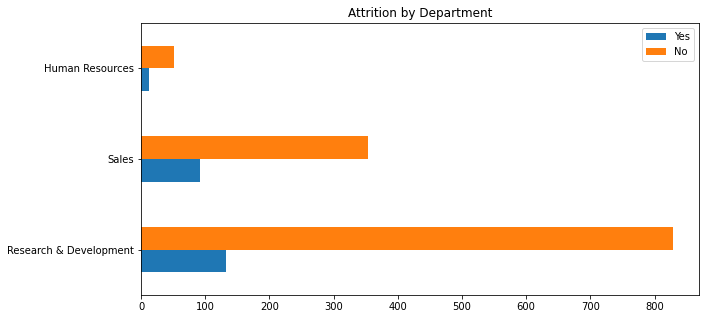

In [236]:
attrition_Department = pd.DataFrame()

attrition_Department['Yes'] = attrition[attrition['Attrition'] == 'Yes']['Department'].value_counts()
attrition_Department['No'] = attrition[attrition['Attrition'] == 'No']['Department'].value_counts()

attrition_Department.plot.barh(title = 'Attrition by Department', figsize = (10, 5));

#### Sales department has the highest attrition

### Which age groups have highest attrition?

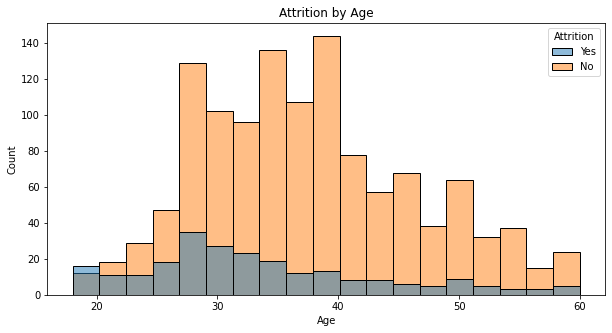

In [235]:
plt.figure(figsize = (10, 5))
sb.histplot(data=attrition,x='Age',hue='Attrition')
plt.title(label='Attrition by Age')
plt.show();

#### The above visualization shows that twenties to mid thirties age range has the highest attrition

### What is the gender distribution across the employees age groups?

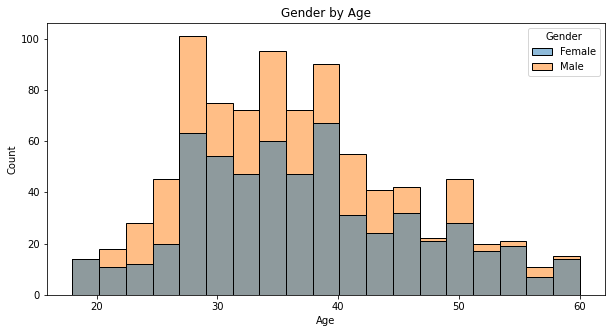

In [196]:
plt.figure(figsize = (10, 5))
sb.histplot(data=attrition,x='Age',hue='Gender')
plt.title(label='Gender by Age')
plt.show();

#### Generally we can tell that there are more males than females across almost all the age groups. However, it is interesting that on the earliest ages between 18 to twenty years old, females are more than males. Also on the later ages from fifty two years old and over the gender gap is significantly reduced

### What is the summary view of the caterorical variables by attrition?

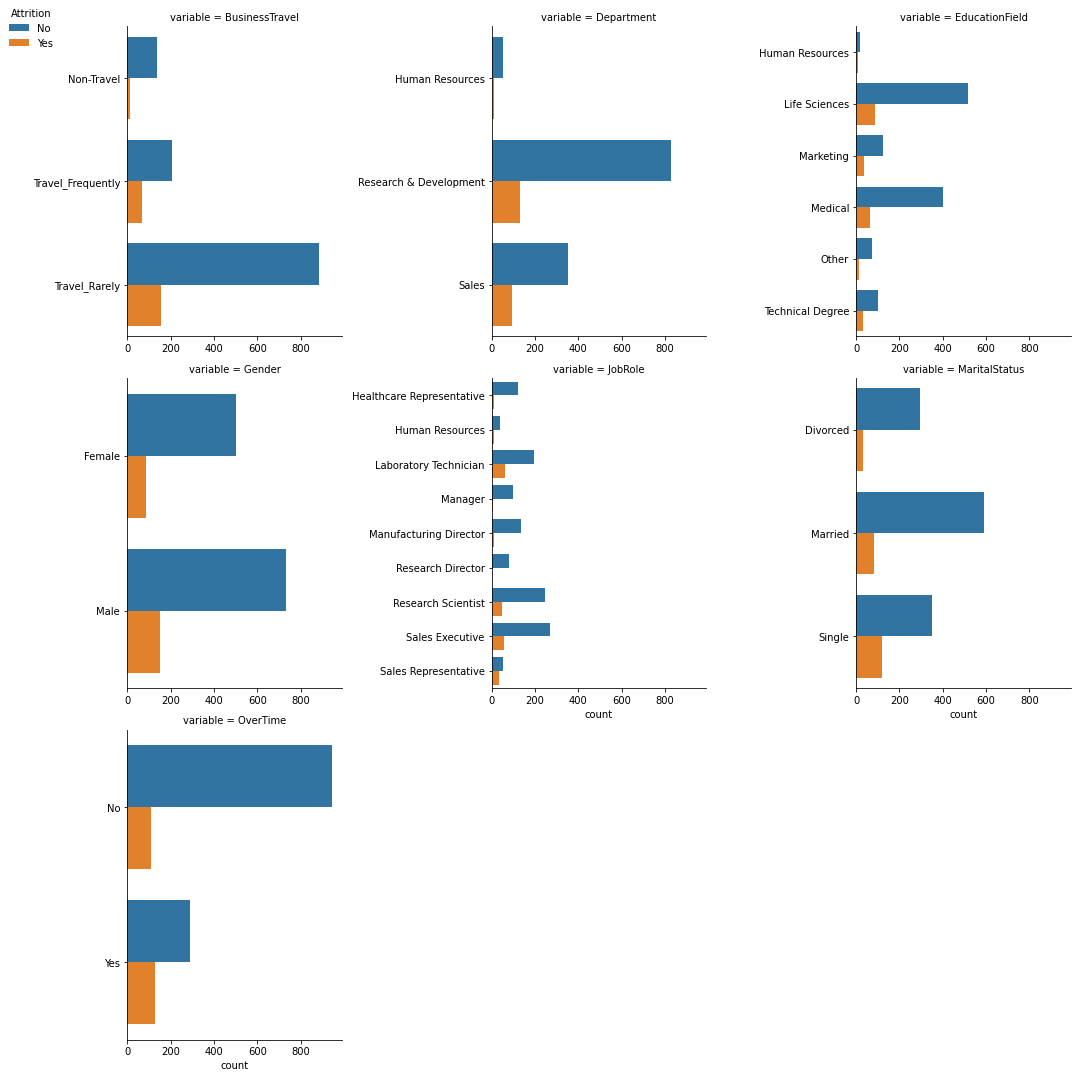

In [272]:
# count of category per variable
val = nominal_df.melt(value_name = 'category', id_vars = 'Attrition')\
    .groupby(['variable', 'category', 'Attrition']).size().to_frame('count').reset_index()
g = sb.catplot(
    data=val, x='count', y='category', col='variable', hue = 'Attrition', kind='bar', col_wrap=3,
    orient = 'h', sharey = False
)

# show x-label for all facet
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)
    
sb.move_legend(g, 'upper left')
g.set(ylabel = None);

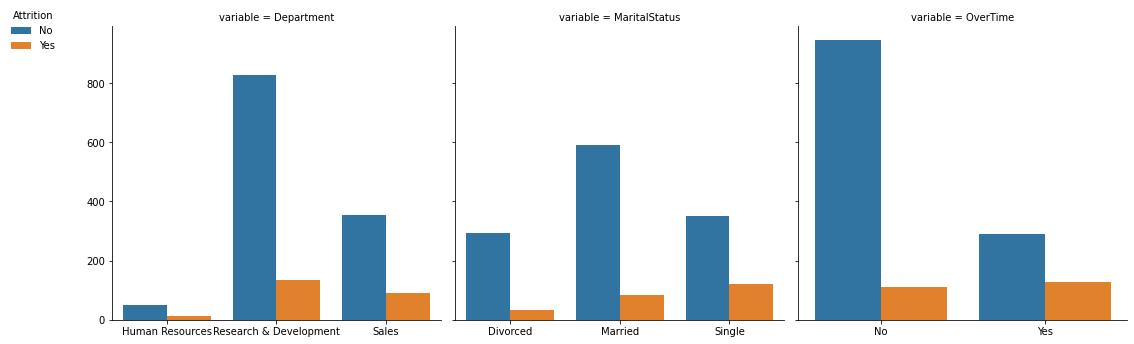

In [278]:
# highest attrition rates from the nominal categorical variables
nominal_vars = ['Department','MaritalStatus','OverTime']
nominals = attrition[nominal_vars]

val = pd.concat([attrition['Attrition'], nominals], axis = 1)\
    .melt(value_name = 'category', id_vars = 'Attrition')\
    .groupby(['variable', 'category', 'Attrition']).size().to_frame('count').reset_index()
g = sb.catplot(
    data=val, x='category', y='count', col='variable', hue = 'Attrition', kind='bar', col_wrap=3,
    sharex = False
)
# show x-label for all facet
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)
    
sb.move_legend(g, 'upper left', bbox_to_anchor=(-0.05, 1))
g.set(ylabel = None, xlabel = None);

### What is the impact of gender and overtime on attrition?

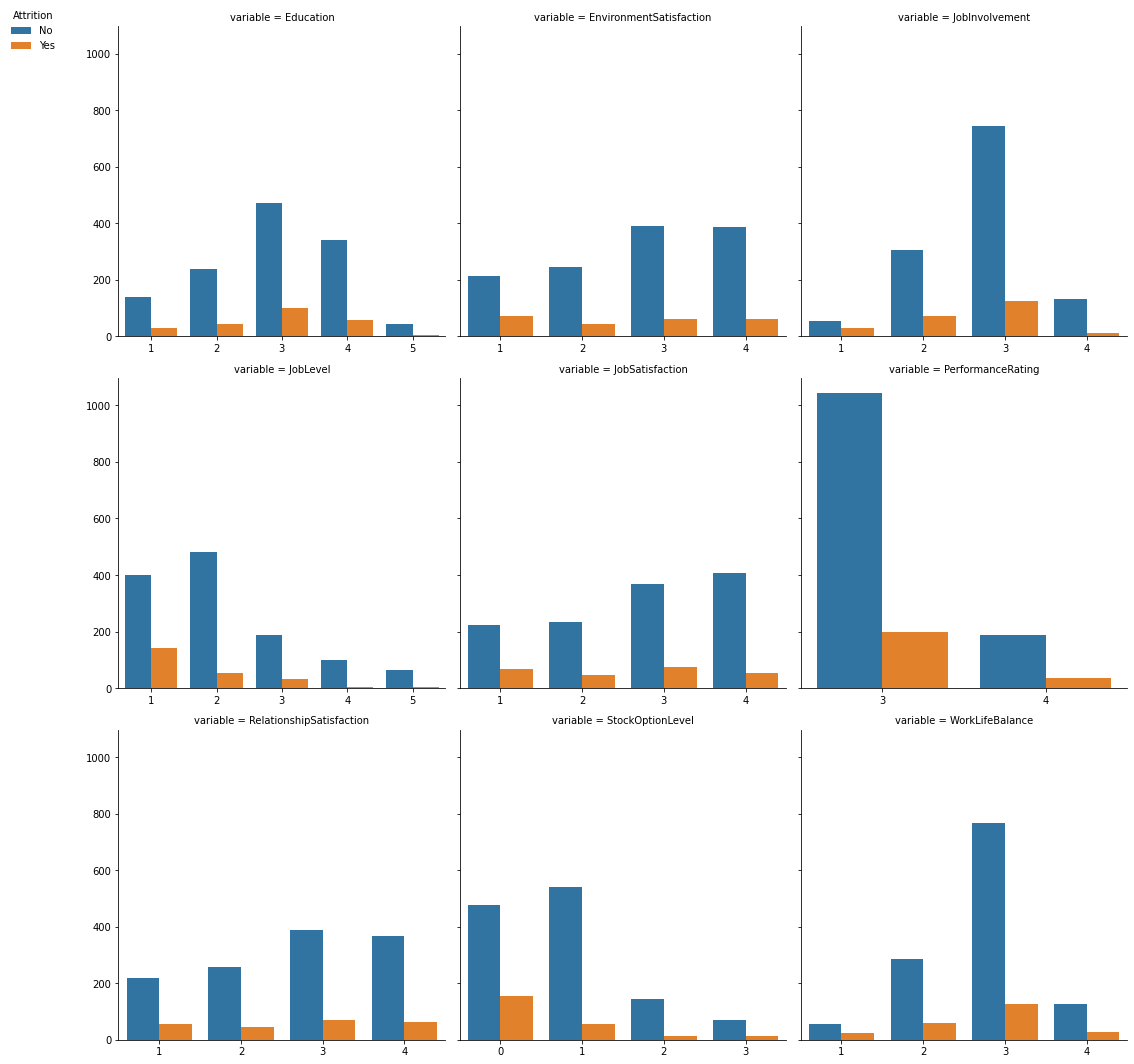

In [279]:
ordinal = ['Education', 'EnvironmentSatisfaction', 'JobLevel', 'JobInvolvement', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance', 'StockOptionLevel']
ordinal_df = attrition[ordinal]

val = pd.concat([attrition['Attrition'], ordinal_df], axis = 1)\
    .melt(value_name = 'category', id_vars = 'Attrition')\
    .groupby(['variable', 'category', 'Attrition']).size().to_frame('count').reset_index()
g = sb.catplot(
    data=val, x='category', y='count', col='variable', hue = 'Attrition', kind='bar', col_wrap=3,
    sharex = False
)
# show x-label for all facet
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)
    
sb.move_legend(g, 'upper left', bbox_to_anchor=(-0.05, 1))
g.set(ylabel = None, xlabel = None);

#### Attrition is mostly experienced from males than females, this could also be due to the fact that most of the employees are males. Most employees do not work overtime and attrition is high for non-overtime employees which also makes it hard to tell the real impact of overtime on attrition.

#### Attrition is highest among employees at lower job levels and low relationship satisfaction, bad work life balance as well as zero stock option levels.

### What is the summary view of the numerical variables by attrition?

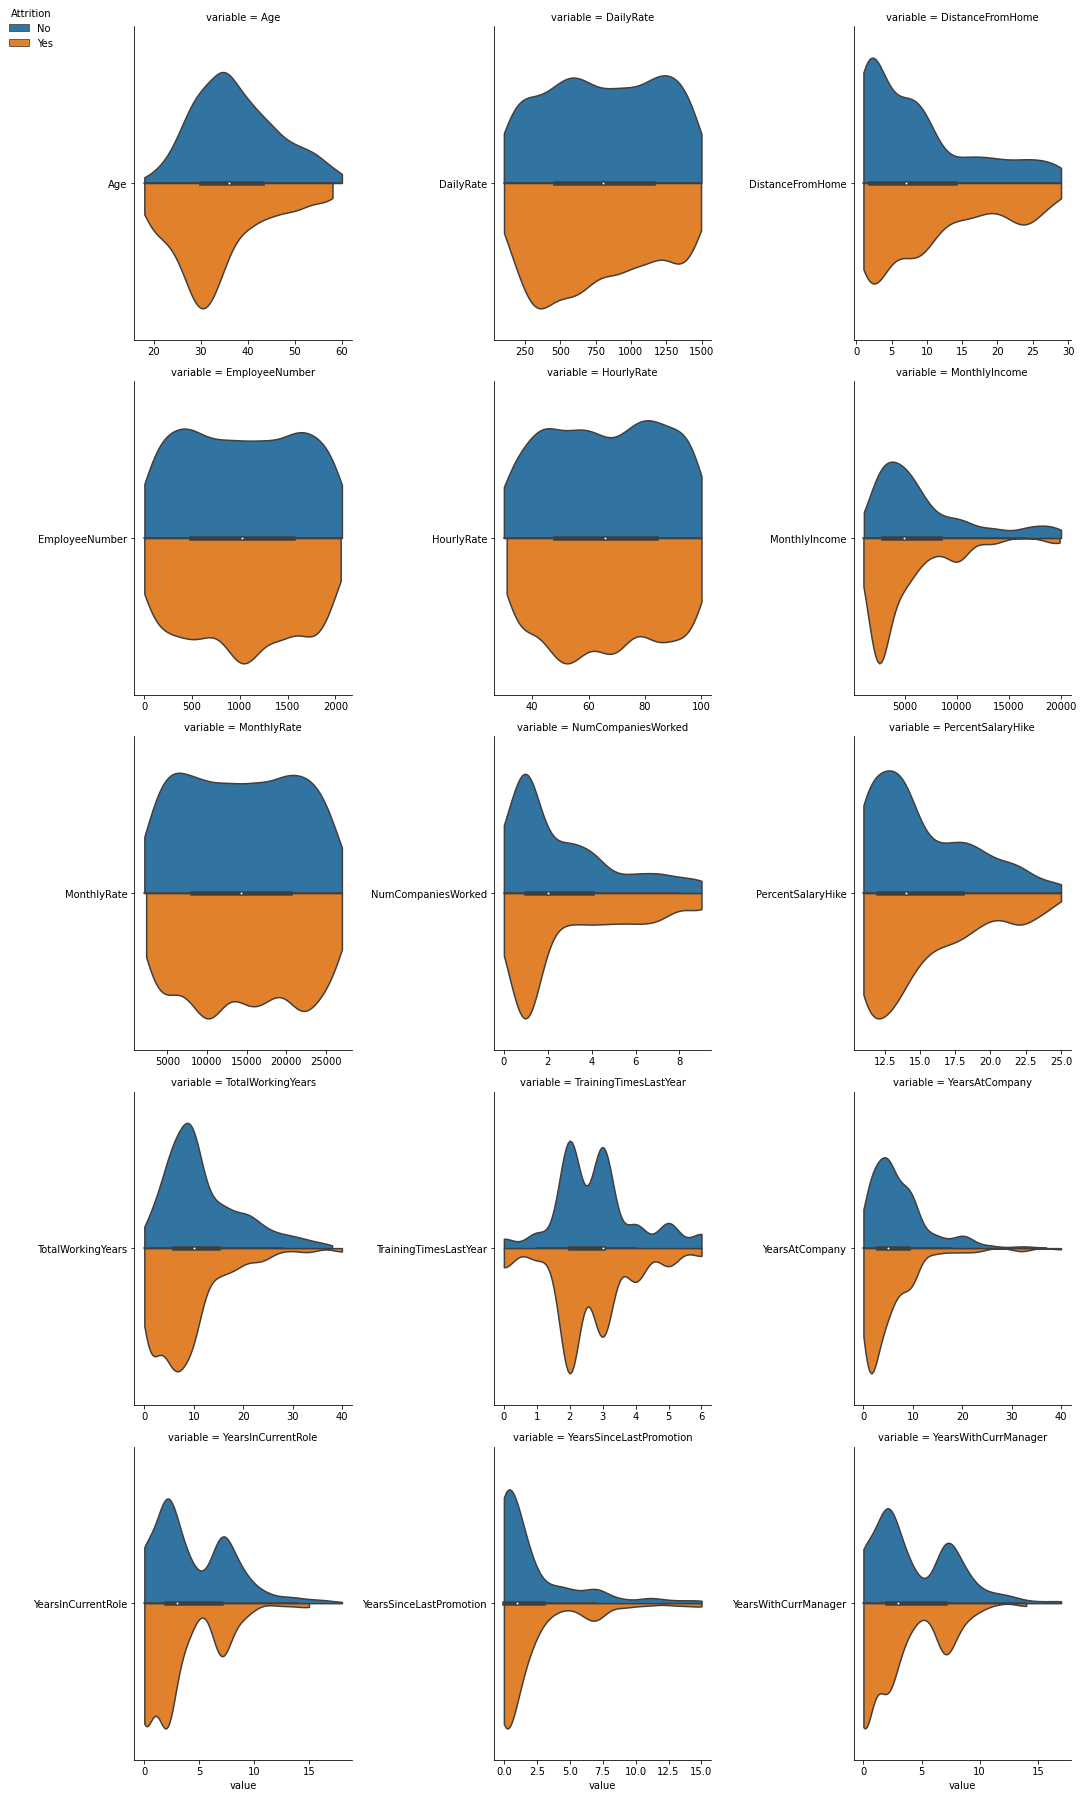

In [198]:
# Check numeric variables
numerical_vars = attrition.describe().columns
numerics = attrition[numerical_vars].reset_index(drop = True).drop(ordinal_vars, axis = 1)
numerics.describe()

val = pd.concat([attrition['Attrition'], numerics], axis = 1)\
    .melt(value_name = 'value', id_vars = 'Attrition')

# compare the distribution of numeric features based on attrition
g = sb.catplot(
    data=val, x='value', y='variable', hue='Attrition', hue_order = ['No', 'Yes'],
    kind='violin', bw=.25, cut=0, split=True, col = 'variable', col_wrap = 3,
    sharey = False, sharex = False
)
g.set(ylabel=None)
sb.move_legend(g, 'upper left');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Attrition is highest among employees with lower monthly income of below 5000, employees who have worked in few companies say less than 2, workers with a low percent salary hike, employees with less than 10 working years, employees who received their last training in less than 3 years, people who have been in the company for less than 3 years, less than 3 years role incumbents, people with no promotion and those with less than an year with their current managers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Generally there are more males than females across almost all the age groups. However, it is interesting that on the earliest ages between 18 to twenty years old, females are more than males. Also on the later ages from fifty two years old and over the gender gap is significantly reduced

## Multivariate Exploration

### What is the relationship between age, attrition and gender?

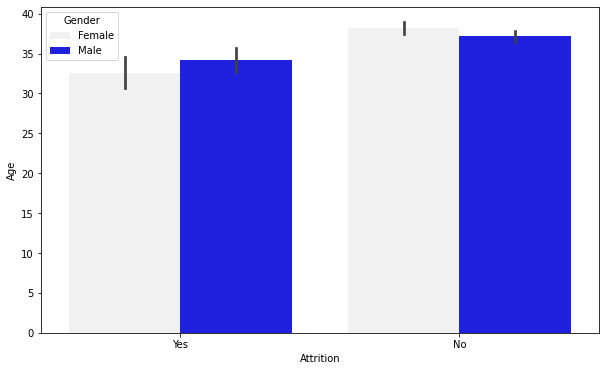

In [199]:
plt.figure(figsize = (10, 6))
sb.barplot(data = attrition, x = 'Attrition', y = 'Age', hue = 'Gender', color='blue');

#### In the earlier observed high attrition age range(18-35), looking at the employees who have left males are the majority. On the other hand, looking at the employees who have not left within the same range females are the majority

### Which job role has the oldest age group and highest attrition?

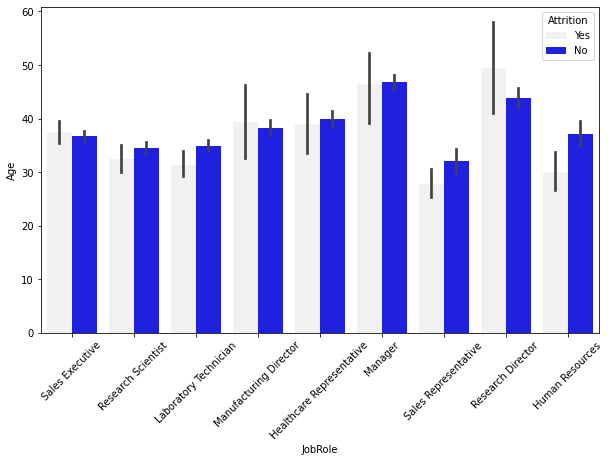

In [200]:
#attrition by job role
plt.figure(figsize = (10, 6))
sb.barplot(data = attrition, x = 'JobRole', y = 'Age', hue = 'Attrition', color='blue')
plt.xticks(rotation = 45);

#### Research director role has the highest attrition and oldest age group, also important to note that manager has attrition almost to equal levels with non-attrition

### Which variables have the highest correlation?

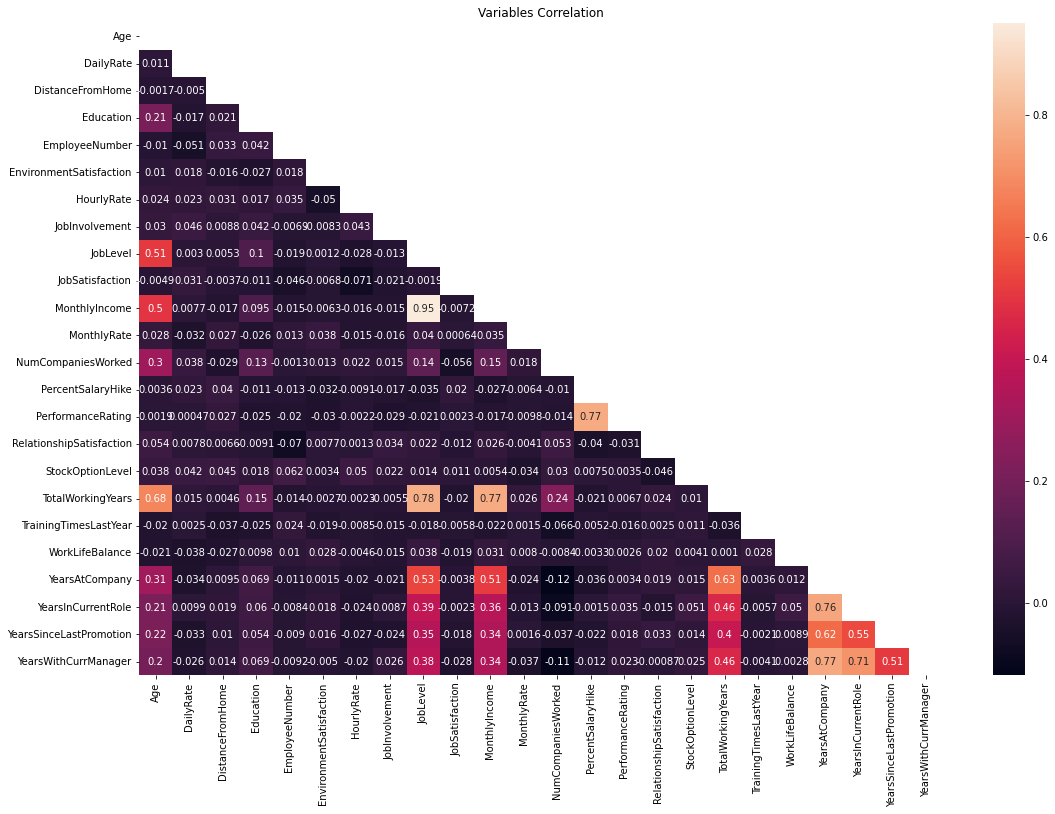

In [201]:
plt.figure(figsize=(18,12))
mask = np.triu(np.ones_like(attrition.corr()))
sb.heatmap(attrition.corr(),mask=mask, annot=True);
plt.title(label='Variables Correlation');

#### Monthly income and Job level have the highest correlation

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

High correlation between some variables such as monthly income and job level, total working years and job level, monthly income and total working years, percentage salary hike and performance rating, years at company and year in current role,, yeras at company and years with current manager as well as, years in current role and years with current manager suggest that these variables have a relationship that strengthens each other.



### Were there any interesting or surprising interactions between features?

It was interesting to observe that, in univariate observation that high attrition age range is 18-35 years, looking at the employees who have left in this range males are the majority. On the other hand, looking at the employees who have not left within the same range females are the majority

## Conclusions

During exploration I removed variables with constant values as they would bring no impact on the exploration, these variables are: EmployeeCount, Over18, StandardHours

Observations from the explorations indicate that:

Most employees stay with the organization compared to those who leave, are married, are males, do not work overtime, did life sciences, are in Research and Development department,travel with majority travelling rarely, are Sales Executives, are in their late twenties, mid and late thirties, have at least a bachelor, have either high or very high environment satisfaction and have a high job involvement.


In job satisfaction, majority of the employees have a high or very high satisfaction. The performance rating is mostly excellent. Relationship satifaction is either high or very high for most employees. Most employees have a better work life balance with the following majority having a good work life balance.

Highest attrition is coming from technical degree and marketing education fields respectively. Highest attrition is coming from employees with Sales Representative title and sales department has the highest attrition. Twenties to mid thirties age range has the highest attrition.

Attrition is highest among employees in the age range of between late twenties to mid-thirties, those with a longer distance from home, those with a lower daily rate of between 250 - 500, employees monthly income of below 5000, employees who have worked in few companies say less than 2, workers with a low percent salary hike of less than 12.5, employees with less than 10 working years, employees who received their last training in less than 3 years, people who have been in the company for less than 3 years, less than 3 years role incumbents, people with no promotion and those with less than an year with their current managers.

Monthly income and Job level have the highest correlation. In addition, there is a high correlation between some variables such as monthly income and job level, total working years and job level, monthly income and total working years, percentage salary hike and performance rating, years at company and year in current role, years at company and years with current manager as well as, years in current role and years with current manager. This high correlation shows that these variables have a relationship that strengthens each other.

In conclusion, it was interesting to observe that, in the earlier observed high attrition age range(18-35), looking at the employees who have left males are the majority. On the other hand, looking at the employees who have not left within the same range females are the majority.